Clasificación básica de imágenes
===

* 30:00 min | Última modificación: Mayo 3, 2021 | [YouTube]

Adaptado de en: 

* https://www.tensorflow.org/tutorials/quickstart/beginner

* https://www.tensorflow.org/tutorials/keras/classification

![assets/fashion-mnist-sprite.png](../../assets/fashion-mnist-sprite.png)

## Importación de librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.4.1


## Carga y configuración del dataset MNIST

In [35]:
#
#  Descarga de los datos
#
(
    (train_images, train_labels),
    (test_images, test_labels),
) = keras.datasets.fashion_mnist.load_data()

#
#  Nombres de las clases
#
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

print("Valor\tNombre")
print("-"*40)
for i, name in enumerate(class_names):
    print(i, "\t", name, sep="")

Valor	Nombre
----------------------------------------
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot


In [3]:
#
#  Cantidad de patrones de entrenamiento y prueba
#
train_images.shape, len(train_labels), test_images.shape, len(test_labels)

((60000, 28, 28), 60000, (10000, 28, 28), 10000)

## Preprocesamiento

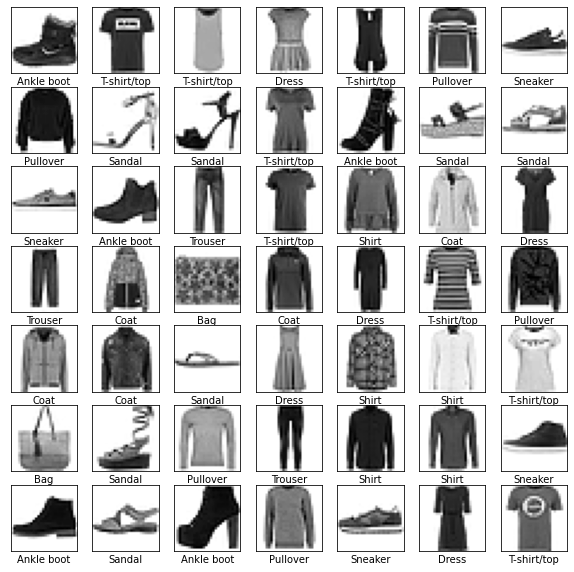

In [36]:
#
# Las figuras son de 28x28 pixels, y el
# color va enntre 0 y 255. Se realiza la 
# Normalización del color al rango [0, 1]
#
train_images, test_images = train_images / 255.0, test_images / 255.0

#
# Ejemplos de las figuras que contiene el dataset
#
plt.figure(figsize=(10, 10))
for i in range(49):
    plt.subplot(7, 7, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construcción del modelo usando Keras

In [7]:
#
#  Configuración de las capas
#
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)

# Ver: https://en.wikipedia.org/wiki/Softmax_function
#      https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

#
# Características del modelo creado
#
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
#
# La salida del modelo son probabilidades para
# cada una de las clases. Aunque el modelo no
# esta entrenado si tiene pesos aleatorios.
#
model(train_images[:1]).numpy()

array([[0.15934587, 0.30494338, 0.06846216, 0.0516071 , 0.15461019,
        0.03278139, 0.01437898, 0.09870396, 0.03860205, 0.07656489]],
      dtype=float32)

## Función de costo

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_fn(
    train_labels[:1],
    model(train_images[:1]).numpy(),
).numpy()

2.3295503

## Compilación del modelo

In [11]:
#
#  Compilación del modelo
#
model.compile(
    optimizer="adam",
    loss=loss_fn,
    metrics=["accuracy"],
)

## Entrenamiento

In [13]:
model.fit(
    train_images,
    train_labels,
    epochs=20,
    verbose=1,
)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5616 - accuracy: 0.8998
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5600 - accuracy: 0.9016
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5607 - accuracy: 0.9006
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5578 - accuracy: 0.9035
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5584 - accuracy: 0.9031
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5585 - accuracy: 0.9027
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5566 - accuracy: 0.9046
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5557 - accuracy: 0.9058
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5548 - accuracy: 0.9064
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.554

## Evaluación

In [14]:
test_loss, test_acc = model.evaluate(train_images,  train_labels, verbose=2)

test_loss, test_acc

1875/1875 - 2s - loss: 1.5483 - accuracy: 0.9131


(1.5482670068740845, 0.9131333231925964)

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

test_loss, test_acc

313/313 - 1s - loss: 1.5841 - accuracy: 0.8765


(1.5840721130371094, 0.8765000104904175)

## Guardar y restaurar el modelo en formato SavedModel

In [29]:
#
# En este formato el modelo se debe salvar a
# una carpeta
#
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [30]:
!ls saved_model/my_model

assets	saved_model.pb	variables


In [31]:
#
# Carga el modelo a una nueva variable
#
new_model = tf.keras.models.load_model('saved_model/my_model')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Guardar y restarurar del modelo en formato HDF5

In [32]:
#
# En este formato, todo el modelo queda guardado
# en un archivo
#
model.save('my_model.h5')

In [33]:
new_model = tf.keras.models.load_model('my_model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Pronóstico

In [16]:
#
#  Realiza la predicción para el conjunto de test
#
predictions = model.predict(test_images)

In [17]:
#
#  Valores asignados a cada una de las clases
#  para el primer ejemplo
#
predictions[0]

array([2.8073737e-30, 3.9366476e-25, 6.0967419e-30, 2.5330105e-31,
       8.1641994e-29, 1.5078000e-16, 1.1506341e-28, 4.7625489e-12,
       2.2825325e-25, 1.0000000e+00], dtype=float32)

In [18]:
#
#  Suma de los valores asignados a cada clase para el primer
#  ejemplo. Puede asimilarse a probabilidad.
#
sum(predictions[0])

1.0000000000047626

In [19]:
#
#  Label para el que se produce el valor más alto para el primer ejemplo
#
np.argmax(predictions[0])

9

In [20]:
#
#  Grafica la imagen
#
def plot_image(i, predictions_array, true_label, img):

    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],
            100 * np.max(predictions_array),
            class_names[true_label],
        ),
        color=color,
    )


#
#  Grafica un diagrama de barras con la probabilidad
#  asignada a cada label
#
def plot_value_array(i, predictions_array, true_label):

    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    #
    # La clase real es azul
    #
    thisplot[predicted_label].set_color("red")

    #
    # El pronóstico es azul
    #
    thisplot[true_label].set_color("blue")

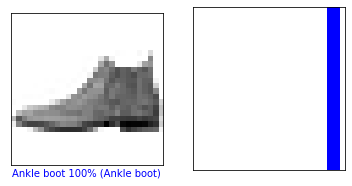

In [21]:
#
#  Ejemplo para la imagen 0 del conjunto de test
#
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

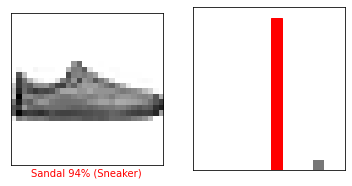

In [22]:
#
#  Ejemplo para la imagen 12 del conjunto de test
#
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

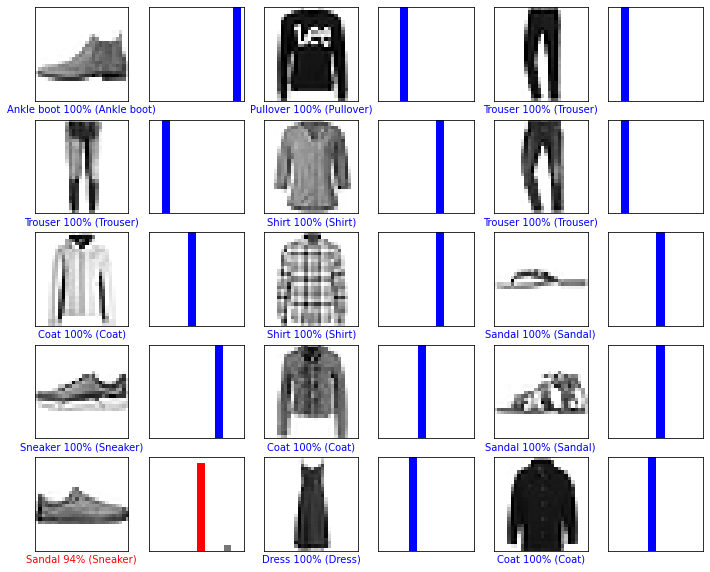

In [23]:
#
#  Evaluación de las primeras 15 imagenes, etiqueta pronosticada y
#  etiqueta verdadera. Etiqueta correcta en azul, equivocada en rojo.
#
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)
plt.show()

## Uso del modelo entrenado

In [24]:
#
#  Imagen a ser pronosticada
#
img = test_images[0]
img.shape  # tamaño

(28, 28)

In [25]:
#
#  Keras está optimizado para generar pronósticos
#  sobre colecciones, por lo que debe crearse una
#  colección de una sola figura
#
img = np.expand_dims(img, 0)
img.shape

(1, 28, 28)

In [26]:
predictions_single = model.predict(img)

print(predictions_single, "\n\n", np.argmax(predictions_single))

[[2.8074166e-30 3.9366476e-25 6.0966952e-30 2.5330493e-31 8.1642614e-29
  1.5078057e-16 1.1506429e-28 4.7625580e-12 2.2825412e-25 1.0000000e+00]] 

 9


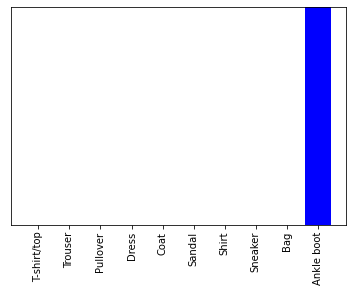

In [27]:
plot_value_array(0, predictions_single, test_labels)

_ = plt.xticks(range(10), class_names, rotation=90)

**Ejercicio.---** ¿Cómo varía la precisión del modelo con la cantidad de neuronas de la capa oculta?